```markdown
MACHINE LEARNING EMG PROJECT
```
``
Project Workflow
``
`
Data pre-processing
`
Feature Design
`
Develelopment of Models
`
Training
`

In [5]:
import os
import pickle

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import display

from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC


In [6]:
#readin in the data
df = pd.read_csv('Project_Data_EE4C12_S&S_EMG.csv')
classes=np.array([
    'unmarked data',
    'hand at rest',
    'hand clenched in a fist',
    'wrist flexion',
    'wrist extension',
    'radial deviations',
    'ulnar deviations',
    'extended palm'
])

print(df.head())
print(df.shape)
num_samples = df.shape[0]

   time  channel1  channel2  channel3  channel4  channel5  channel6  channel7  \
0     1   0.00001  -0.00002  -0.00001  -0.00003   0.00000  -0.00001   0.00000   
1     5   0.00001  -0.00002  -0.00001  -0.00003   0.00000  -0.00001   0.00000   
2     6  -0.00001   0.00001   0.00002   0.00000   0.00001  -0.00002  -0.00001   
3     7  -0.00001   0.00001   0.00002   0.00000   0.00001  -0.00002  -0.00001   
4     8  -0.00001   0.00001   0.00002   0.00000   0.00001  -0.00002  -0.00001   

   channel8  class  label  
0  -0.00001      0      1  
1  -0.00001      0      1  
2   0.00001      0      1  
3   0.00001      0      1  
4   0.00001      0      1  
(4237907, 11)


`
check for n/a values
`

In [7]:
na_counts = df.isna().sum()
display(na_counts.T)

time        0
channel1    0
channel2    0
channel3    0
channel4    0
channel5    0
channel6    0
channel7    0
channel8    0
class       0
label       0
dtype: int64

In [8]:

print("There are " + str(df['label'].nunique()) + " unique subjects in the dataset (different people performing the gestures).")
grouped_df = df.groupby(['label', 'class']).size().unstack(fill_value=0)
display(grouped_df.T)

There are 36 unique subjects in the dataset (different people performing the gestures).


label,1,2,3,4,5,6,7,8,9,10,...,27,28,29,30,31,32,33,34,35,36
class,,,,,,,,,,,,,,,,,,,,,
0,78682,94654,67770,72578,68057,61128,82641,80264,90407,81875,...,64660,64522,64093,98180,53642,75148,73298,85693,60383,65538
1,7311,7140,6443,6471,6506,5814,7523,6468,7083,7690,...,7167,5232,6317,8047,6924,6650,7082,7553,6703,6391
2,6806,6777,6301,6598,6806,6243,7651,6537,6019,6571,...,6686,5628,6460,7279,5975,8085,6316,7458,6247,6093
3,7329,6815,6486,6875,6874,6663,8383,5939,5838,6534,...,6654,5488,7495,7480,6197,8271,6127,7274,6422,6078
4,6824,6812,6421,7193,6724,6688,8923,6027,5776,6766,...,7309,5733,7059,7061,6180,8386,6527,7732,6653,5926
5,7075,6856,6278,7423,6098,7094,8414,6237,6050,6658,...,7405,5245,7261,6700,6028,8604,6225,7710,6897,5743
6,7143,7372,6086,7060,6183,5989,9105,6476,6474,6995,...,6918,5918,7302,7223,6077,7786,6530,7782,6196,5985
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,6591,0,0,0,0,0,0


Percentage of samples for each class relative to the total number of samples:

Percentage of samples for class 0 relative to the total number of samples: 64.30%
Percentage of samples for class 1 relative to the total number of samples: 5.90%
Percentage of samples for class 2 relative to the total number of samples: 5.74%
Percentage of samples for class 3 relative to the total number of samples: 5.89%
Percentage of samples for class 4 relative to the total number of samples: 5.94%
Percentage of samples for class 5 relative to the total number of samples: 5.94%
Percentage of samples for class 6 relative to the total number of samples: 5.97%
Percentage of samples for class 7 relative to the total number of samples: 0.32%


Number of nonzero elements for class 7: 2, for patients (array([10, 29]),)


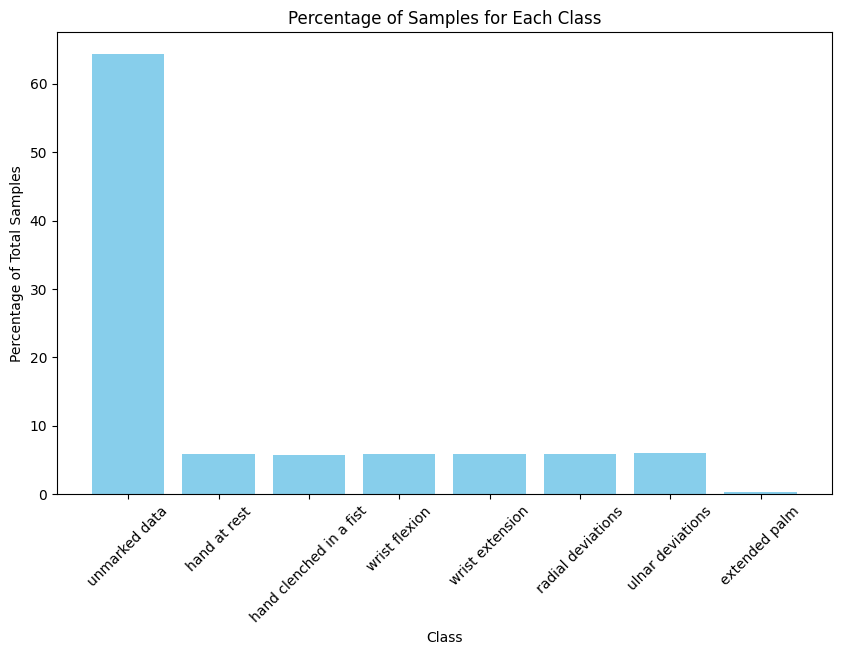

In [9]:
nonzero_count = np.count_nonzero(grouped_df.T.iloc[7])
print(f"Percentage of samples for each class relative to the total number of samples:\n")
for i in range(8):
    nonzero_count = np.count_nonzero(grouped_df.T.iloc[i])
    print(f"Percentage of samples for class {i} relative to the total number of samples: {np.sum(grouped_df.T.iloc[i])/num_samples*100:.2f}%")

print(f"\n\nNumber of nonzero elements for class {i}: {nonzero_count}, for patients {np.nonzero(grouped_df.T.iloc[7])}")

# Calculate the percentages
percentages = [np.sum(grouped_df.T.iloc[i]) / num_samples * 100 for i in range(8)]
# Plot the percentages
plt.figure(figsize=(10, 6))
plt.bar(classes[:8], percentages, color='skyblue')
plt.xlabel('Class')
plt.ylabel('Percentage of Total Samples')
plt.title('Percentage of Samples for Each Class')
plt.xticks(rotation=45)
plt.show()


`
Due to the limited information available on class 7 it was decided that we would only classify on the first 6 classes
`

Percentage of samples for class 0 relative to the total number of samples: 16.68%
Percentage of samples for class 1 relative to the total number of samples: 16.22%
Percentage of samples for class 2 relative to the total number of samples: 16.64%
Percentage of samples for class 3 relative to the total number of samples: 16.78%
Percentage of samples for class 4 relative to the total number of samples: 16.79%
Percentage of samples for class 5 relative to the total number of samples: 16.88%


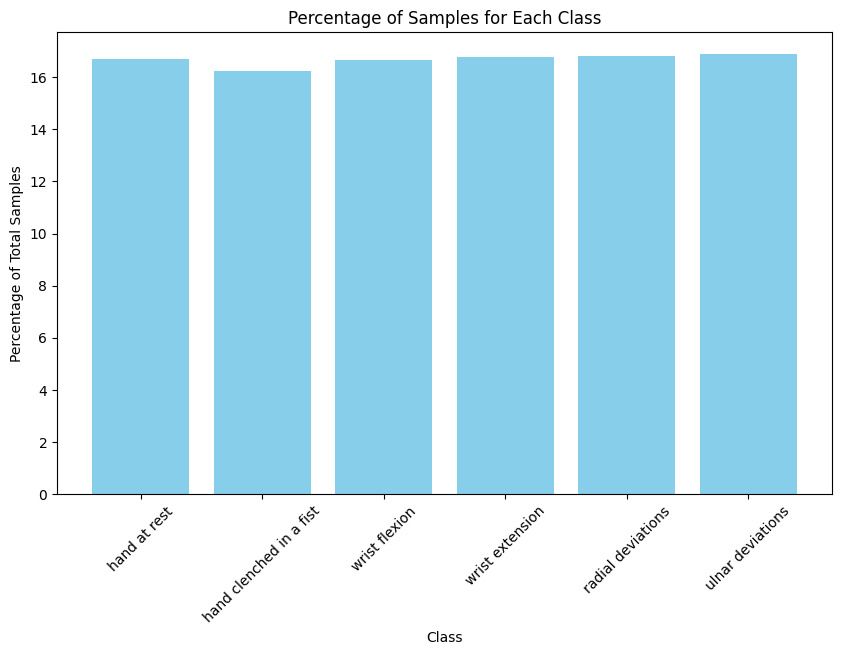

In [27]:

df_preprocessed = df[df['class'] != 7]
df_preprocessed = df_preprocessed[df_preprocessed['class'] != 0]
num_samples_processed = df_preprocessed.shape[0]
grouped_df_preprocess = df_preprocessed.groupby(['label', 'class']).size().unstack(fill_value=0)
classes_preprocessed = classes[1:7]
for i in range(6):
    nonzero_count = np.count_nonzero(grouped_df_preprocess.T.iloc[i])
    print(f"Percentage of samples for class {i} relative to the total number of samples: {np.sum(grouped_df_preprocess.T.iloc[i])/num_samples_processed*100:.2f}%")

#  Calculate the percentages
percentages = [np.sum(grouped_df_preprocess.T.iloc[i]) / num_samples_processed * 100 for i in range(0,6)]
# Plot the percentages
plt.figure(figsize=(10, 6))
plt.bar(classes_preprocessed, percentages, color='skyblue')
plt.xlabel('Class')
plt.ylabel('Percentage of Total Samples')
plt.title('Percentage of Samples for Each Class')
plt.xticks(rotation=45)
plt.show()

``
Lets us visualise the data
``

In [4]:
# Select only the feature columns (assuming there are 9 features)
feature_columns = df_preprocessed.columns[0:9]

# Create a 3x3 grid of subplots
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot the distribution of each feature
for i, feature in enumerate(feature_columns):
    axes[i].hist(df_preprocessed[feature], bins=30, alpha=0.7, color='b')
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

NameError: name 'df_preprocessed' is not defined

In [8]:
# df_preprocessed = df_preprocessed[df_preprocessed['time']< 80000]
y = df_preprocessed['class']
# # Select only the feature columns (assuming there are 9 features)
# feature_columns = df_preprocessed.columns[0:9]

# # Create a 3x3 grid of subplots


# # Flatten the axes array for easy iteration
# axes = axes.flatten()

# plt.hist(df_preprocessed["time"], bins=30, alpha=0.7, color='b')
# plt.title('Distribution of time')
# plt.xlabel("time")
# plt.ylabel('Frequency')

# # Adjust layout
# plt.tight_layout()
# plt.show()

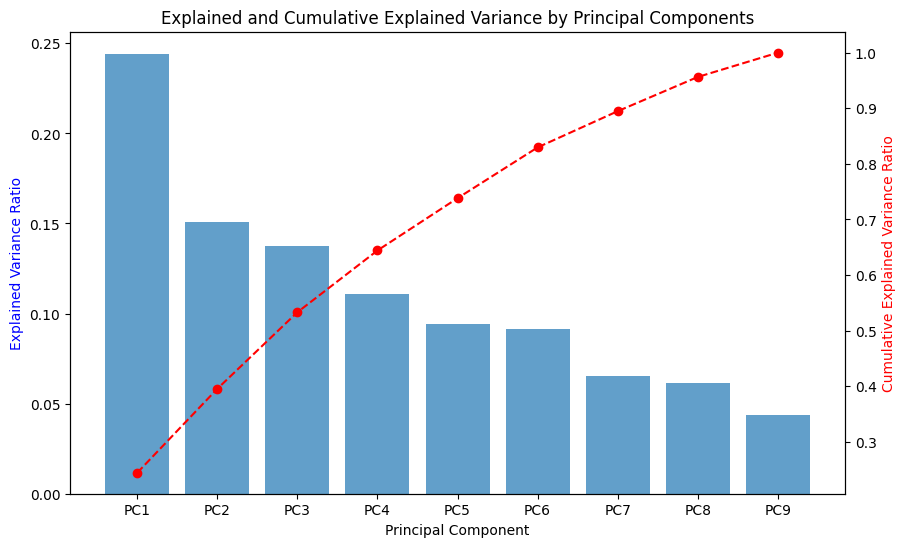

In [9]:


# Select only the feature columns (excluding 'class', and 'label')
feature_columns = df_preprocessed.columns[:9]
X = df_preprocessed[feature_columns]

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the data
X_standardized = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
pca.fit(X_standardized)

# Calculate the explained variance
explained_variance = pca.explained_variance_ratio_

# Calculate the cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance)

# Plot the explained variance and cumulative explained variance on the same figure with two y-axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the explained variance
ax1.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, align='center')
ax1.set_xlabel('Principal Component')
ax1.set_ylabel('Explained Variance Ratio', color='b')
ax1.set_title('Explained and Cumulative Explained Variance by Principal Components')
ax1.set_xticks(range(1, len(explained_variance) + 1))
ax1.set_xticklabels([f'PC{i}' for i in range(1, len(explained_variance) + 1)])

# Create a second y-axis for the cumulative explained variance
ax2 = ax1.twinx()
ax2.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--', color='r')
ax2.set_ylabel('Cumulative Explained Variance Ratio', color='r')

plt.show()


### more than 80% of the variance is explained by the first 6 components, we will try performance of reduced and full data


In [10]:
n_components = 6 # Change this value as needed
# Apply PCA
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_standardized)

# Split the data into train and test sets
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.2, random_state=42)

print(f"Training set shape of pca reduced data: {X_train_pca.shape}")
print(f"Test set shape of pca reduced data: {X_test_pca.shape}")
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_standardized, y, test_size=0.2, random_state=42)

print(f"Training set shape : {X_train.shape}")
print(f"Test set shape: {X_test.shape}")



Training set shape of pca reduced data: (1210200, 6)
Test set shape of pca reduced data: (302550, 6)
Training set shape : (1210200, 9)
Test set shape: (302550, 9)



# Model selection/implementation



## SVM


In [ ]:
# Define the directory and base filename
model_dir = 'models'
os.makedirs(model_dir, exist_ok=True)

# Define the different kernels to train

kernels = ['rbf', 'poly']



# Iterate over each kernel type
for kernel in kernels:
    # Initialize the SVM model with the specified kernel
    svm_model = SVC(kernel=kernel,tol=1e-3, max_iter=10000)
    
    # Train the model on the PCA-reduced training data
    svm_model.fit(X_train, y_train)
    
    # Make predictions on the PCA-reduced test data
    y_pred = svm_model.predict(X_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    print(f"Kernel: {kernel}")
    print(f"Accuracy: {accuracy:.2f}")
    print("Classification Report:")
    print(report)
    
    # Prepare the model filename with kernel name
    version = 1
    while True:
        model_filename = f"{kernel}_svm_{version}.pkl"
        model_path = os.path.join(model_dir, model_filename)
        if not os.path.exists(model_path):
            break
        version += 1

    # Save the model and training loss
    with open(model_path, 'wb') as f:
        pickle.dump({'model': svm_model}, f)

    print(f"Model with {kernel} kernel saved as {model_path}\n")


/home/frank/miniconda3/envs/ML/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Kernel: rbf
Accuracy: 0.45
Classification Report:
              precision    recall  f1-score   support

           1       0.97      0.75      0.84     49836
           2       0.51      0.40      0.44     48761
           3       0.43      0.31      0.36     49992
           4       0.26      0.14      0.18     50221
           5       0.41      0.28      0.33     50327
           6       0.33      0.81      0.47     50657
           7       0.83      0.38      0.52      2756

    accuracy                           0.45    302550
   macro avg       0.53      0.44      0.45    302550
weighted avg       0.49      0.45      0.44    302550

Model with rbf kernel saved as models/rbf_svm_1.pkl



In [ ]:
version = 1
kernel = 'linear'
while True:
        model_filename = f"{kernel}_svm_{version}.pkl"
        model_path = os.path.join(model_dir, model_filename)
        if  os.path.exists(model_path):
            break
        version += 1

# Load the pickled model
with open(model_path, 'rb') as f:
    loaded_model = pickle.load(f)['model']

# Make predictions on the test data
y_pred_loaded = loaded_model.predict(X_test_pca)

# Evaluate the model
accuracy_loaded = accuracy_score(y_test_pca, y_pred_loaded)
report_loaded = classification_report(y_test_pca, y_pred_loaded)

print(f"Loaded Model Accuracy: {accuracy_loaded:.2f}")
print("Loaded Model Classification Report:")
print(report_loaded)

In [11]:

# Define the directory and base filename
model_dir = 'models'
os.makedirs(model_dir, exist_ok=True)

# Define the different neighbor values to train
neighbor_values = [3, 5, 7]  # You can add more values as needed

# Iterate over each neighbor value
for n_neighbors in neighbor_values:
    # Initialize the KNN model with the specified number of neighbors
    knn_model = KNeighborsClassifier(n_neighbors=n_neighbors)
    
    # Train the model on the PCA-reduced training data
    knn_model.fit(X_train, y_train)
    
    # Make predictions on the PCA-reduced test data
    y_pred = knn_model.predict(X_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    print(f"Number of Neighbors: {n_neighbors}")
    print(f"Accuracy: {accuracy:.2f}")
    print("Classification Report:")
    print(report)
    
    # Prepare the model filename with n_neighbors
    version = 1
    while True:
        model_filename = f"knn_{n_neighbors}_neighbors_{version}.pkl"
        model_path = os.path.join(model_dir, model_filename)
        if not os.path.exists(model_path):
            break
        version += 1

    # Save the model
    with open(model_path, 'wb') as f:
        pickle.dump({'model': knn_model}, f)

    print(f"Model with {n_neighbors} neighbors saved as {model_path}\n")


Number of Neighbors: 3
Accuracy: 0.98
Classification Report:
              precision    recall  f1-score   support

           1       0.99      1.00      1.00     49836
           2       0.99      0.98      0.98     48761
           3       0.98      0.98      0.98     49992
           4       0.98      0.98      0.98     50221
           5       0.98      0.98      0.98     50327
           6       0.98      0.98      0.98     50657
           7       0.97      0.96      0.96      2756

    accuracy                           0.98    302550
   macro avg       0.98      0.98      0.98    302550
weighted avg       0.98      0.98      0.98    302550

Model with 3 neighbors saved as models/knn_3_neighbors_1.pkl

Number of Neighbors: 5
Accuracy: 0.98
Classification Report:
              precision    recall  f1-score   support

           1       0.99      1.00      1.00     49836
           2       0.99      0.98      0.98     48761
           3       0.98      0.98      0.98     49992
  